

Сравним 3 значения параметра spread для обучения RBFN на исходных данных номер 5
Графики подписаны



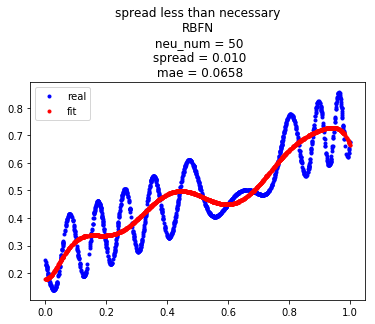

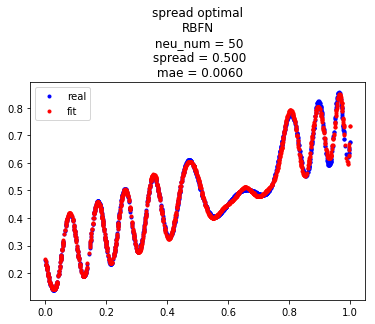

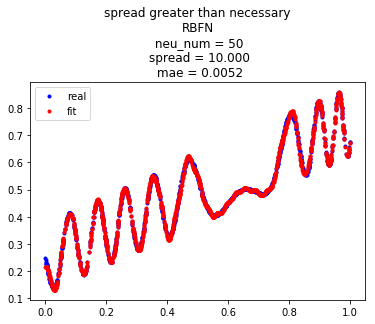

In [108]:
#Task 1
#Compare 3 value of spread
#spread less than necessary,spread optimal and spread more than necessary
import sys
sys.path.append("../..") 

import LABS.ZeroLab.E_Function as dataset5
from ADDITIONAL.IMPLEMENTATIONS.RBF.RBFN import RBFN

import matplotlib.pyplot as plt
import numpy as np

print("\n\nСравним 3 значения параметра spread для обучения RBFN на исходных данных номер 5\nГрафики подписаны\n")



(x_train, y_train), (x_test, y_test) = dataset5.load_data(train_size=6000, show=False)

neu_num = 50
titles=["spread less than necessary","spread optimal","spread greater than necessary"]
spreads=[0.01,0.5,10.0]

for title,spread in zip(titles,spreads):
    model = RBFN(hidden_shape=neu_num, sigma=spread)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mae = (np.abs(y_test - y_pred)).mean()

    plt.plot(x_test, y_test, 'b.', label='real')
    plt.plot(x_test, y_pred, 'r.', label='fit')
    plt.legend(loc='upper left')
    plt.title(title+'\nRBFN\n neu_num = %.d\n spread = %.3f\n mae = %.4f' %
              (neu_num, spread,mae))
    plt.show()







Построим график зависимости ошибки аппроксимации от параметра spread в логарифмическом масштабе


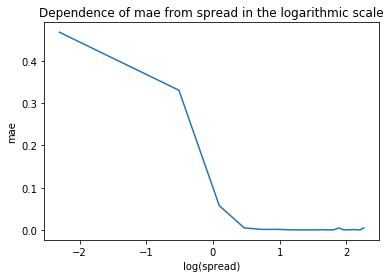

In [109]:
# Task1
# Dependence of mae from spread in the logarithmic scale
print("\n\nПостроим график зависимости ошибки аппроксимации от параметра spread в логарифмическом масштабе")


maes=np.empty(0)
spreads=np.empty(0)

for spread in np.arange(0.1,10,step=0.5):
    model = RBFN(hidden_shape=neu_num, sigma=np.log(spread))
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    

    maes = np.append(maes,(np.abs(y_test - y_pred)).mean())
    spreads=np.append(spreads,np.log(spread))

plt.plot(spreads,maes)
plt.legend(loc='upper left')
plt.title('Dependence of mae from spread in the logarithmic scale')
plt.xlabel("log(spread)")
plt.ylabel("mae")
plt.show()






В данной реализации функция которую реализует GRNN может быть функционально очень похожа на исходную функцию, однако mae при этом может быть довольно высокой

Приведем пример поиска оптимального значения параметра speread для размера выборки = 6000


--------------spread = 0.1000000000-------------------




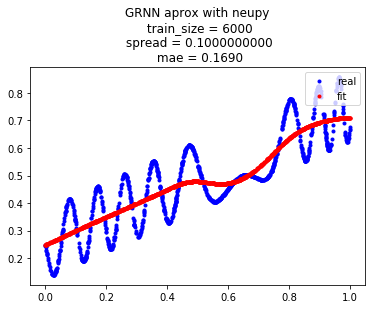

0.1
0.16903138024297154


--------------spread = 0.0100000000-------------------




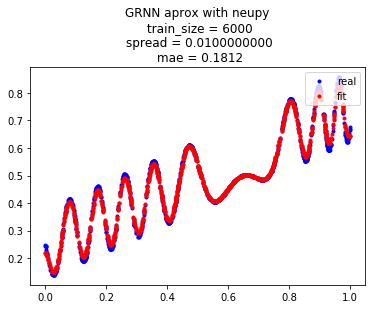

0.01
0.18122983112034155


--------------spread = 0.0010000000-------------------




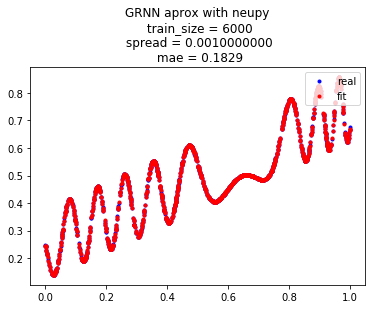

0.001
0.18290819049506912


--------------spread = 0.0001000000-------------------




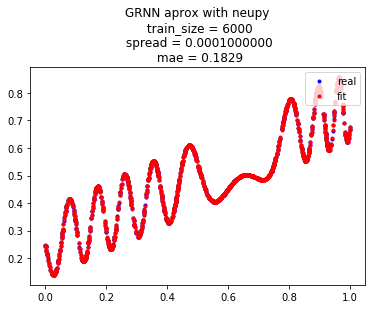

0.0001
0.18293445303783393


--------------spread = 0.0000100000-------------------




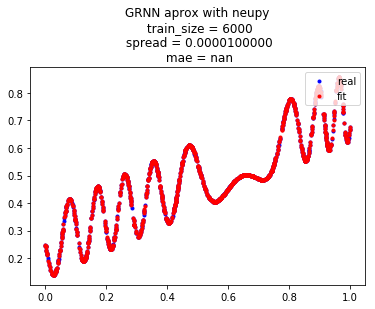

1e-05
nan


Оптимальный параметр spread для выборки размером 6000:
spread =  1e-06


In [81]:
#Task 1.3 GRNN exploring
from __future__ import print_function
import LABS.ZeroLab.E_Function as dataset5

from neupy import algorithms
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = dataset5.load_data(train_size=6000, show=False)


maes=np.empty(0)
train_sizes=[6000]


print("\n\nВ данной реализации функция которую реализует GRNN может быть функционально очень похожа на исходную функцию\n")
print("однако mae при этом может быть довольно высокой")
print("Приведем пример поиска оптимального значения параметра speread для размера выборки = 6000")

goal_loss=0.01
mae=0.2
spread=0.1
while mae > goal_loss:
    print("\n\n--------------spread = %.10f-------------------\n\n"%spread)
    for train_size in train_sizes:
        test_size = int(train_size * 0.2)

        nw = algorithms.GRNN(std=spread, verbose=False)

        nw.train(x_train[0:train_size], y_train[0:train_size])

        y_pred = nw.predict(x_test[0:test_size])

        mae = (np.abs(y_test[0:test_size] - y_pred)).mean()

        plt.plot(x_test[0:test_size], y_test[0:test_size], 'b.', label='real')
        plt.plot(x_test[0:test_size], y_pred, 'r.', label='fit')
        plt.legend(loc='upper right')
        plt.title('GRNN aprox with neupy\n train_size = %.d\n spread = %.10f\n mae = %.4f' % (train_size,spread,mae))
        plt.show()
    print(spread)
    print(mae)
    spread*=0.1

print("\n\nОптимальный параметр spread для выборки размером 6000:")
print("spread = ",spread)



Определим оптимальные значения параметра spread для выборок размером 3000,2000,1000



--------------train_size = 3000-------------------




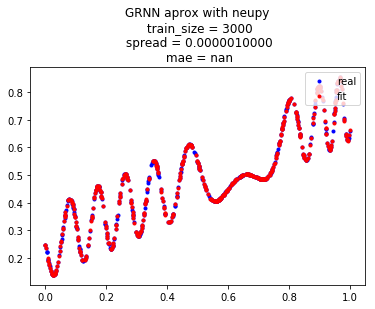



Оптимальный параметр spread для выборки размером 3000:
spread =  1e-06


--------------train_size = 2000-------------------




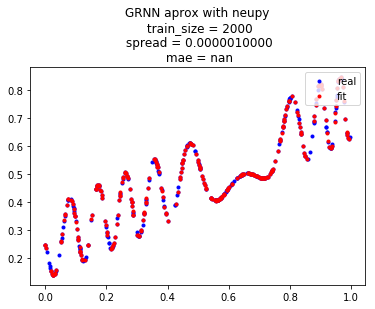



Оптимальный параметр spread для выборки размером 2000:
spread =  1e-06


--------------train_size = 1000-------------------




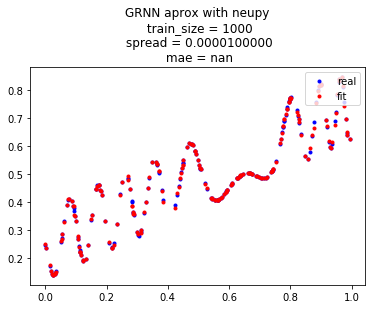



Оптимальный параметр spread для выборки размером 1000:
spread =  1e-05


In [86]:
#Task 1.3 GRNN

import LABS.ZeroLab.E_Function as dataset5

from neupy import algorithms
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = dataset5.load_data(train_size=6000, show=False)


train_sizes=[3000,2000,1000]
spreads=[0.1,0.01,0.001,0.0001]
print("\n\nОпределим оптимальные значения параметра spread для выборок размером 3000,2000,1000\n")



for train_size in train_sizes:
    goal_loss=0.15
    mae=0.2
    spread=0.1
    print("\n\n--------------train_size = %.d-------------------\n\n"%train_size)
    i=0
    while mae > goal_loss:
        test_size = int(train_size * 0.2)

        nw = algorithms.GRNN(std=spread, verbose=False)

        nw.train(x_train[0:train_size], y_train[0:train_size])

        y_pred = nw.predict(x_test[0:test_size])

        mae = (np.abs(y_test[0:test_size] - y_pred)).mean()
        spread*=0.1
        

    plt.plot(x_test[0:test_size], y_test[0:test_size], 'b.', label='real')
    plt.plot(x_test[0:test_size], y_pred, 'r.', label='fit')
    plt.legend(loc='upper right')
    plt.title('GRNN aprox with neupy\n train_size = %.d\n spread = %.10f\n mae = %.4f' % (train_size,spread,mae))
    plt.show()
    

    print("\n\nОптимальный параметр spread для выборки размером %.d:"%train_size)
    print("spread = ",spread)




Сравним и визуализируем случаи, когда spread больше, меньше и равен оптимальному значению для
случая деления плоскости 2 класса
Все графики подписаны



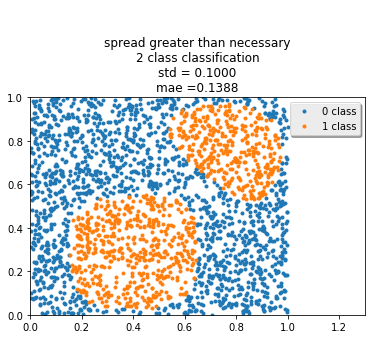

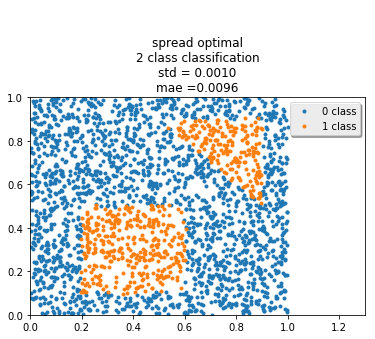

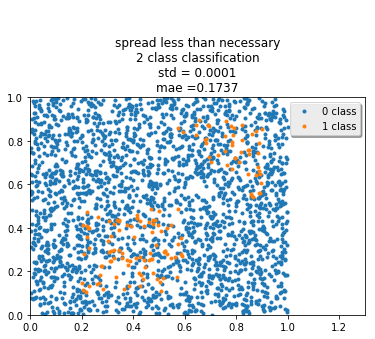

In [104]:
#Task 2 ,part 1 
import matplotlib.pyplot as plt
import numpy as np
from neupy import algorithms
from mpl_toolkits.mplot3d import Axes3D

import LABS.ZeroLab.C_DivIntoTwoClasses as dataset3

print("\n\nСравним и визуализируем случаи, когда spread больше, меньше и равен оптимальному значению для")
print("случая деления плоскости 2 класса\nВсе графики подписаны\n")

(x_train, y_train), (x_test, y_test) = dataset3.load_data(train_size=12000, show=False)
titles = ["\n\nspread greater than necessary", "\n\nspread optimal", "\n\nspread less than necessary"]
spreads = [0.1, 0.001, 0.0001]

for spread, title in zip(spreads, titles):
    pnn = algorithms.PNN(std=spread, verbose=False)

    pnn.train(x_train, y_train)

    y_predicted = pnn.predict(x_test)

    mae = (np.abs(y_test - y_predicted)).mean()

    plt_x_zero = np.empty(0)
    plt_y_zero = np.empty(0)

    plt_x_one = np.empty(0)
    plt_y_one = np.empty(0)

    acc = 0.0
    i = 0
    for coord in x_test:
        if y_predicted[i] < 0.5:
            plt_x_zero = np.append(plt_x_zero, coord[0])
            plt_y_zero = np.append(plt_y_zero, coord[1])
        elif y_predicted[i] >= 0.5:
            plt_x_one = np.append(plt_x_one, coord[0])
            plt_y_one = np.append(plt_y_one, coord[1])
        i += 1

    plt.plot(plt_x_zero, plt_y_zero, '.')
    plt.plot(plt_x_one, plt_y_one, '.')

    plt.title(title+'\n2 class classification\nstd = %.4f\nmae =%.4f' % (spread, mae))

    plt.xlim(0, 1.3)
    plt.ylim(0, 1)

    plt.legend(('0 class', '1 class'), loc='upper right', shadow=True)

    plt.show()
    plt.close()




Построим поверхность ошибки в плоскости двух параметров: ширина РБФ-функции spread и
объем обучающей выборки.



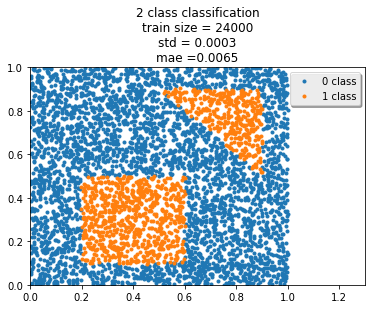

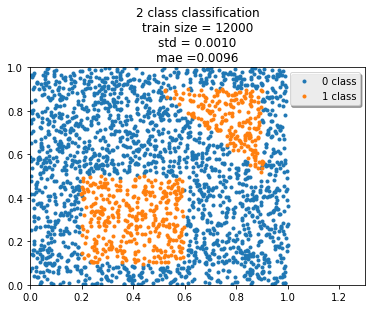

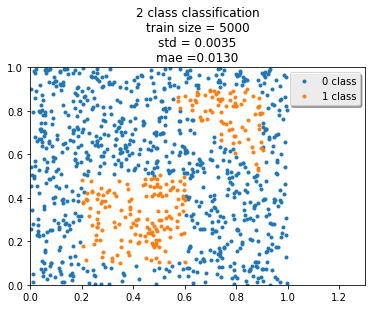

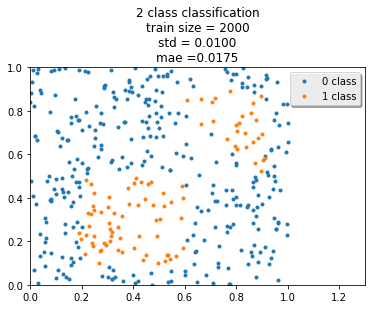

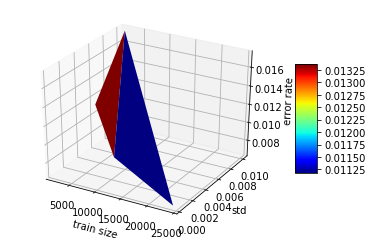

In [102]:
##Task 2 ,part 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from neupy import algorithms
from mpl_toolkits.mplot3d import Axes3D


print("\n\nПостроим поверхность ошибки в плоскости двух параметров: ширина РБФ-функции spread и")
print("объем обучающей выборки.\n")



maes = [0, 0, 0, 0]
train_size = [24000, 12000, 5000, 2000]
std = [0.00035, 0.001, 0.0035, 0.01]

for j in range(0, 4):
    (x_train, y_train), (x_test, y_test) = dataset3.load_data(train_size=train_size[j], show=False)

    pnn = algorithms.PNN(std=std[j], verbose=False)

    pnn.train(x_train, y_train)

    y_predicted = pnn.predict(x_test)

    mae = (np.abs(y_test - y_predicted)).mean()

    plt_x_zero = np.empty(0)
    plt_y_zero = np.empty(0)

    plt_x_one = np.empty(0)
    plt_y_one = np.empty(0)

    acc = 0.0
    i = 0
    for coord in x_test:
        if y_predicted[i] < 0.5:
            plt_x_zero = np.append(plt_x_zero, coord[0])
            plt_y_zero = np.append(plt_y_zero, coord[1])
        elif y_predicted[i] >= 0.5:
            plt_x_one = np.append(plt_x_one, coord[0])
            plt_y_one = np.append(plt_y_one, coord[1])
        i += 1

    plt.plot(plt_x_zero, plt_y_zero, '.')
    plt.plot(plt_x_one, plt_y_one, '.')

    plt.title('2 class classification\ntrain size = %d\nstd = %.4f\nmae =%.4f' % (train_size[j], std[j], mae))

    maes[j] = mae

    plt.xlim(0, 1.3)
    plt.ylim(0, 1)

    plt.legend(('0 class', '1 class'), loc='upper right', shadow=True)

    plt.show()
    plt.close()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('train size')
ax.set_ylabel('std')
ax.set_zlabel('error rate')
df = pd.DataFrame({'x': train_size, 'y': std, 'z': maes})
surf = ax.plot_trisurf(df.x, df.y, df.z, cmap=cm.jet, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()



Сравним и визуализируем случаи, когда spread больше, меньше и равен оптимальному значению для
случая деления плоскости 7 классов
Все графики подписаны



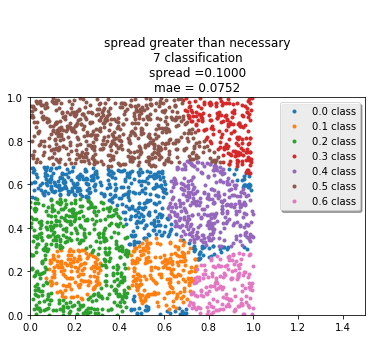

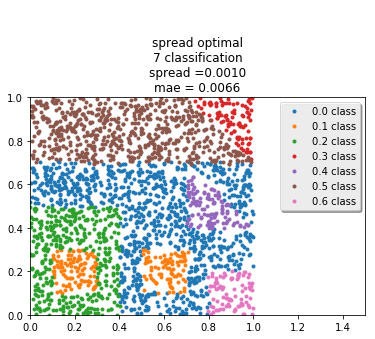

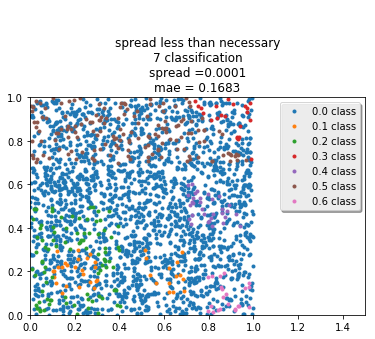

In [103]:
#Task 3 ,part 1 

import LABS.ZeroLab.D_DivIntoNClasses as dataset4
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from neupy import algorithms
from mpl_toolkits.mplot3d import Axes3D

print("\n\nСравним и визуализируем случаи, когда spread больше, меньше и равен оптимальному значению для")
print("случая деления плоскости 7 классов\nВсе графики подписаны\n")

(x_train, y_train), (x_test, y_test) = dataset4.load_data_neupy(train_size=12000, show=False)

titles = ["\n\nspread greater than necessary", "\n\nspread optimal", "\n\nspread less than necessary"]
spreads = [0.1, 0.001, 0.0001]
for spread,title in zip(spreads,titles):
    pnn = algorithms.PNN(std=spread, verbose=False)

    pnn.train(x_train, y_train)

    y_predicted = pnn.predict(x_test)

    mae = (np.abs(y_test - y_predicted)).mean()

    plt_x_zero = np.empty(0)
    plt_y_zero = np.empty(0)

    plt_x_one = np.empty(0)
    plt_y_one = np.empty(0)

    plt_x_two = np.empty(0)
    plt_y_two = np.empty(0)

    plt_x_three = np.empty(0)
    plt_y_three = np.empty(0)

    plt_x_four = np.empty(0)
    plt_y_four = np.empty(0)

    plt_x_five = np.empty(0)
    plt_y_five = np.empty(0)

    plt_x_six = np.empty(0)
    plt_y_six = np.empty(0)

    i = 0
    for predict in y_predicted:

        if predict == 0.0:
            plt_x_zero = np.append(plt_x_zero, x_test[i][0])
            plt_y_zero = np.append(plt_y_zero, x_test[i][1])
        elif predict == 0.1:
            plt_x_one = np.append(plt_x_one, x_test[i][0])
            plt_y_one = np.append(plt_y_one, x_test[i][1])
        elif predict == 0.2:
            plt_x_two = np.append(plt_x_two, x_test[i][0])
            plt_y_two = np.append(plt_y_two, x_test[i][1])
        elif predict == 0.3:
            plt_x_three = np.append(plt_x_three, x_test[i][0])
            plt_y_three = np.append(plt_y_three, x_test[i][1])
        elif predict == 0.4:
            plt_x_four = np.append(plt_x_four, x_test[i][0])
            plt_y_four = np.append(plt_y_four, x_test[i][1])
        elif predict == 0.5:
            plt_x_five = np.append(plt_x_five, x_test[i][0])
            plt_y_five = np.append(plt_y_five, x_test[i][1])
        elif predict == 0.6:
            plt_x_six = np.append(plt_x_six, x_test[i][0])
            plt_y_six = np.append(plt_y_six, x_test[i][1])
        i += 1

    plt.plot(plt_x_zero, plt_y_zero, '.')
    plt.plot(plt_x_one, plt_y_one, '.')
    plt.plot(plt_x_two, plt_y_two, '.')
    plt.plot(plt_x_three, plt_y_three, '.')
    plt.plot(plt_x_four, plt_y_four, '.')
    plt.plot(plt_x_five, plt_y_five, '.')
    plt.plot(plt_x_six, plt_y_six, '.')

    plt.xlim(0, 1.5)
    plt.ylim(0, 1)

    plt.legend(('0.0 class', '0.1 class', '0.2 class', '0.3 class', '0.4 class', '0.5 class',
                '0.6 class'), loc='upper right', shadow=True)

    plt.title(title+'\n7 classification\nspread =%.4f\nmae = %.4f' % (spread, mae))

    plt.show()
    plt.close()



Построим поверхность ошибки в плоскости двух параметров: ширина РБФ-функции spread и
объем обучающей выборки.



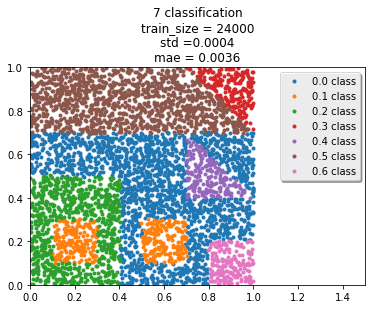

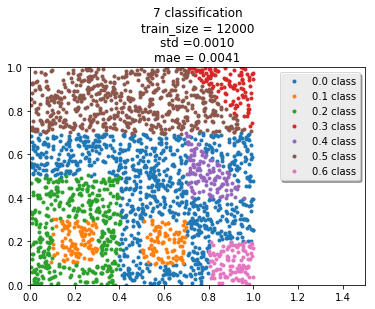

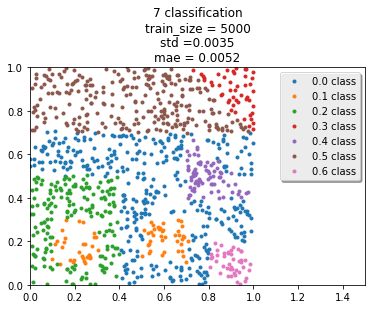

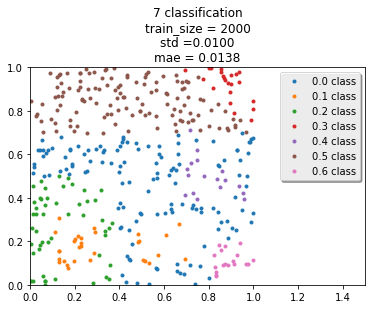

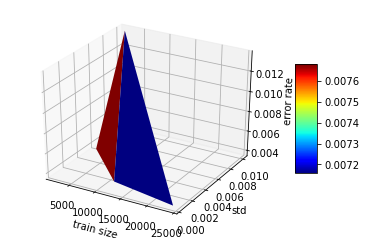

In [93]:
##Task 3 ,part 2

import LABS.ZeroLab.D_DivIntoNClasses as dataset4
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from neupy import algorithms
from mpl_toolkits.mplot3d import Axes3D

print("\n\nПостроим поверхность ошибки в плоскости двух параметров: ширина РБФ-функции spread и")
print("объем обучающей выборки.\n")


maes = [0, 0, 0, 0]
train_size = [24000, 12000, 5000, 2000]
std = [0.0004, 0.001, 0.0035, 0.01]

for j in range(0, 4):
    (x_train, y_train), (x_test, y_test) = dataset4.load_data_neupy(train_size=train_size[j], show=False)

    pnn = algorithms.PNN(std=std[j], verbose=False)

    pnn.train(x_train, y_train)

    y_predicted = pnn.predict(x_test)

    mae = (np.abs(y_test - y_predicted)).mean()

    plt_x_zero = np.empty(0)
    plt_y_zero = np.empty(0)

    plt_x_one = np.empty(0)
    plt_y_one = np.empty(0)

    plt_x_two = np.empty(0)
    plt_y_two = np.empty(0)

    plt_x_three = np.empty(0)
    plt_y_three = np.empty(0)

    plt_x_four = np.empty(0)
    plt_y_four = np.empty(0)

    plt_x_five = np.empty(0)
    plt_y_five = np.empty(0)

    plt_x_six = np.empty(0)
    plt_y_six = np.empty(0)

    acc = 0.0
    i = 0
    for predict in y_predicted:

        if predict == 0.0:
            plt_x_zero = np.append(plt_x_zero, x_test[i][0])
            plt_y_zero = np.append(plt_y_zero, x_test[i][1])
        elif predict == 0.1:
            plt_x_one = np.append(plt_x_one, x_test[i][0])
            plt_y_one = np.append(plt_y_one, x_test[i][1])
        elif predict == 0.2:
            plt_x_two = np.append(plt_x_two, x_test[i][0])
            plt_y_two = np.append(plt_y_two, x_test[i][1])
        elif predict == 0.3:
            plt_x_three = np.append(plt_x_three, x_test[i][0])
            plt_y_three = np.append(plt_y_three, x_test[i][1])
        elif predict == 0.4:
            plt_x_four = np.append(plt_x_four, x_test[i][0])
            plt_y_four = np.append(plt_y_four, x_test[i][1])
        elif predict == 0.5:
            plt_x_five = np.append(plt_x_five, x_test[i][0])
            plt_y_five = np.append(plt_y_five, x_test[i][1])
        elif predict == 0.6:
            plt_x_six = np.append(plt_x_six, x_test[i][0])
            plt_y_six = np.append(plt_y_six, x_test[i][1])
        i += 1

    plt.plot(plt_x_zero, plt_y_zero, '.')
    plt.plot(plt_x_one, plt_y_one, '.')
    plt.plot(plt_x_two, plt_y_two, '.')
    plt.plot(plt_x_three, plt_y_three, '.')
    plt.plot(plt_x_four, plt_y_four, '.')
    plt.plot(plt_x_five, plt_y_five, '.')
    plt.plot(plt_x_six, plt_y_six, '.')

    plt.xlim(0, 1.5)
    plt.ylim(0, 1)

    plt.legend(('0.0 class', '0.1 class', '0.2 class', '0.3 class', '0.4 class', '0.5 class',
                '0.6 class'), loc='upper right', shadow=True)

    plt.title('7 classification\ntrain_size = %d\nstd =%.4f\nmae = %.4f' % (train_size[j], std[j], mae))

    maes[j] = mae

    plt.show()
    plt.close()



fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('train size')
ax.set_ylabel('std')
ax.set_zlabel('error rate')
df = pd.DataFrame({'x': train_size, 'y': std, 'z': maes})
surf = ax.plot_trisurf(df.x, df.y, df.z, cmap=cm.jet, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()



In [ ]:
import LABS.ZeroLab.F_ImagesGenerator as dataset8
from sklearn import metrics
from neupy import algorithms
import numpy as np

from ADDITIONAL.IMAGE_CHANGER import get_pxs, noise


(x_train, y_train), (x_test, y_test) = dataset8.load_data(mode=0)

pnn = algorithms.PNN(std=1, batch_size=128, verbose=True)

pnn.train(x_train[0:10000], y_train[0:10000])

y_predicted = pnn.predict(x_test)

local_path = 'MY_IMAGES_GIMP/'
for nTest in np.arange(0, 10, 1):
    # convert to numpy array
    x = get_pxs(local_path + str(nTest) + '.png')

    # Inverting and normalizing image
    x = 255 - x
    x /= 255
    x = np.expand_dims(x, axis=0)
    x.shape = (1, 784)

    prediction = pnn.predict(x)

    print('REAL \t\tPREDICTED')
    print(str(nTest) + '\t\t\t' + str(prediction[0]))

print("accuracy = %.2f" % (metrics.accuracy_score(y_predicted, y_test)))


for i in range(0, 10000):
    x_test[i] = noise(x_test[i], 500)

y_predicted = pnn.predict(x_test)

print("accuracy on noise data = %.2f" % (metrics.accuracy_score(y_predicted, y_test)))


In [111]:
from sklearn import metrics
from neupy import algorithms
import numpy as np

from ADDITIONAL.IMAGE_CHANGER import show_image_by_pxs, get_pxs, noise
import LABS.ZeroLab.F_ImagesGenerator as dataset8

print("\n\nРешим задачу классификации многомерных образов с помощью PNN используя обучающие выборки разных размеров\n\n")


train_size = [15000, 10000, 5000, 2000]
std = [2, 1, 0.5, 0.25]

for j in range(0, 4):
    (x_train, y_train), (x_test, y_test) = dataset8.load_data(mode=0)

    pnn = algorithms.PNN(std=std[j], batch_size=128, verbose=True)

    pnn.train(x_train[0:train_size[j]], y_train[0:train_size[j]])

    y_predicted = pnn.predict(x_test)

    maes = metrics.accuracy_score(y_predicted, y_test)

    print("accuracy = %.2f" % (maes))



Решим задачу классификации многомерных образов с помощью PNN используя обучающие выборки разных размеров




Time: 0:29:17 | 55%|########################                    | ETA:  0:23:18

KeyboardInterrupt: 